# **Exploratory Data Analysis - Terrorism**

In [1]:
import math
import warnings
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go

warnings.filterwarnings('ignore')

### Importing csv file

In [2]:
data = pd.read_csv('/content/output.csv')

In [3]:
data.head()

,Year,Month,Day,CountryNo,Country,Region,City,success,AttackType,NoOfKills,PropertyValue,TargetType,latitude,GroupName,longitude,TargetSubType,Target,WeaponType,WeaponDetail
0,1970,7,2,58,Dominican Republic,Central America & Caribbean,Santo Domingo,1,Assassination,1.0,0.0,Private Citizens & Property,18.456792,MANO-D,-69.951164,Named Civilian,Julio Guzman,Unknown,NaN
1,1970,0,0,130,Mexico,North America,Mexico city,1,Hostage Taking (Kidnapping),0.0,0.0,Government (Diplomatic),19.371887,23rd of September Communist League,-99.086624,"Diplomatic Personnel (outside of embassy, cons...","Nadine Chaval, daughter",Unknown,NaN
2,1970,1,0,160,Philippines,Southeast Asia,Unknown,1,Assassination,1.0,0.0,Journalists & Media,15.478598,Unknown,120.599741,Radio Journalist/Staff/Facility,Employee,Unknown,NaN
3,1970,1,0,78,Greece,Western Europe,Athens,1,Bombing/Explosion,0.0,0.0,Government (Diplomatic),37.997490,Unknown,23.762728,Embassy/Consulate,U.S. Embassy,Explosives,Explosive
4,1970,1,0,101,Japan,East Asia,Fukouka,1,Facility/Infrastructure Attack,0.0,0.0,Government (Diplomatic),33.580412,Unknown,130.396361,Embassy/Consulate,U.S. Consulate,Incendiary,Incendiary


In [4]:
data.dtypes

Year               int64
Month              int64
Day                int64
CountryNo          int64
Country           object
Region            object
City              object
success            int64
AttackType        object
NoOfKills        float64
PropertyValue    float64
TargetType        object
latitude         float64
GroupName         object
longitude        float64
TargetSubType     object
Target            object
WeaponType        object
WeaponDetail      object
dtype: object

In [5]:
data.columns

Index(['Year', 'Month', 'Day', 'CountryNo', 'Country', 'Region', 'City',
       'success', 'AttackType', 'NoOfKills', 'PropertyValue', 'TargetType',
       'latitude', 'GroupName', 'longitude', 'TargetSubType', 'Target',
       'WeaponType', 'WeaponDetail'],
      dtype='object')

checking for **null** **values**

In [6]:
data.isnull().sum()

Year                 0
Month                0
Day                  0
CountryNo            0
Country              0
Region               0
City                 0
success              0
AttackType           0
NoOfKills            0
PropertyValue        0
TargetType           0
latitude          4556
GroupName            0
longitude         4557
TargetSubType    10373
Target               0
WeaponType           0
WeaponDetail     67670
dtype: int64

In [7]:
data['NoOfKills'].fillna(int(data['NoOfKills'].median()),inplace=True)
data['latitude'].fillna(data['latitude'].mean(), inplace=True)
data['longitude'].fillna(data['longitude'].mean(), inplace=True)

### **droping null values**

In [8]:
data.dropna(subset=['Target', 'TargetSubType', 'WeaponType', 'WeaponDetail', 'GroupName'], inplace=True)


In [9]:
data.isnull().sum()

Year             0
Month            0
Day              0
CountryNo        0
Country          0
Region           0
City             0
success          0
AttackType       0
NoOfKills        0
PropertyValue    0
TargetType       0
latitude         0
GroupName        0
longitude        0
TargetSubType    0
Target           0
WeaponType       0
WeaponDetail     0
dtype: int64

droping **CountryNo**

In [10]:
data.drop(['CountryNo'], axis=1)


,Year,Month,Day,Country,Region,City,success,AttackType,NoOfKills,PropertyValue,TargetType,latitude,GroupName,longitude,TargetSubType,Target,WeaponType,WeaponDetail
3,1970,1,0,Greece,Western Europe,Athens,1,Bombing/Explosion,0.0,0.0,Government (Diplomatic),37.997490,Unknown,23.762728,Embassy/Consulate,U.S. Embassy,Explosives,Explosive
4,1970,1,0,Japan,East Asia,Fukouka,1,Facility/Infrastructure Attack,0.0,0.0,Government (Diplomatic),33.580412,Unknown,130.396361,Embassy/Consulate,U.S. Consulate,Incendiary,Incendiary
5,1970,1,1,United States,North America,Cairo,1,Armed Assault,0.0,0.0,Police,37.005105,Black Nationalists,-89.176269,"Police Building (headquarters, station, school)",Cairo Police Headquarters,Firearms,Several gunshots were fired.
6,1970,1,2,Uruguay,South America,Montevideo,0,Assassination,0.0,0.0,Police,-34.891151,Tupamaros (Uruguay),-56.187214,Police Security Forces/Officers,Juan Maria de Lucah/Chief of Directorate of in...,Firearms,Automatic firearm
8,1970,1,2,United States,North America,Madison,1,Facility/Infrastructure Attack,0.0,60000.0,Military,43.076592,New Year's Gang,-89.412488,Military Recruiting Station/Academy,"R.O.T.C. offices at University of Wisconsin, M...",Incendiary,Firebomb consisting of gasoline
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181680,2017,12,31,Somalia,Sub-Saharan Africa,Wajid,1,Bombing/Explosion,0.0,0.0,Military,3.810951,Al-Shabaab,43.246506,Military Barracks/Base/Headquarters/Checkpost,Ethiopian Base,Explosives,More than 10 mortars were used in the attack.
181681,2017,12,31,Philippines,Southeast Asia,Shariff Aguak,1,Bombing/Explosion,1.0,-99.0,Police,6.862806,Bangsamoro Islamic Freedom Movement (BIFM),124.443649,Police Patrol (including vehicles and convoys),Patrol,Explosives,A roadside bomb was used in the attack.
181684,2017,12,31,India,South Asia,Hungrum,1,Hostage Taking (Kidnapping),0.0,0.0,Government (General),25.180162,Zeliangrong United Front,93.015788,Politician or Political Party Movement/Meeting...,Personal Security Officer of Council Member Ih...,Firearms,A 9-mm carbine rifle was used in the attack.
181687,2017,12,31,Syria,Middle East & North Africa,Jableh,1,Bombing/Explosion,2.0,-99.0,Military,35.407278,Muslim extremists,35.942679,Military Barracks/Base/Headquarters/Checkpost,Hmeymim Air Base,Explosives,Mortars were used in the attack.


# **Features**

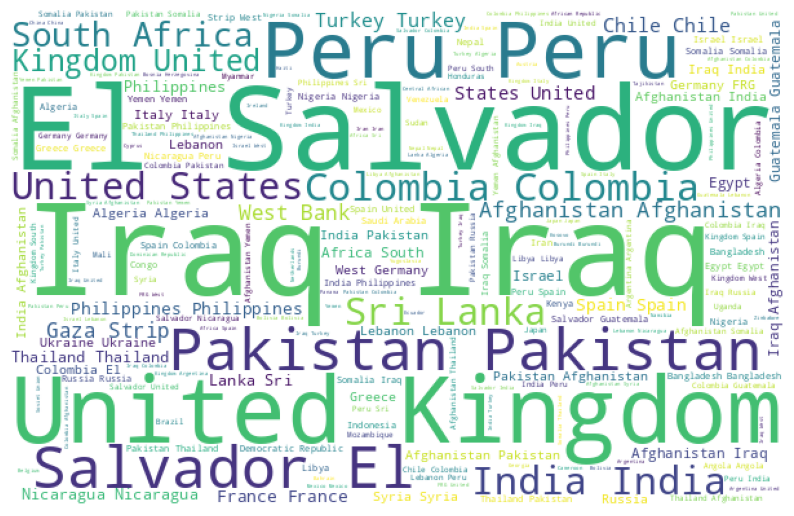

In [11]:
from wordcloud import WordCloud
from scipy import signal
Country = data.Country.dropna(False)
plt.subplots(figsize=(10,10))
wordcloud = WordCloud(background_color = 'white',
                     width = 600,
                     height = 384).generate(' '.join(Country))

plt.axis('off')
plt.imshow(wordcloud)
plt.show()




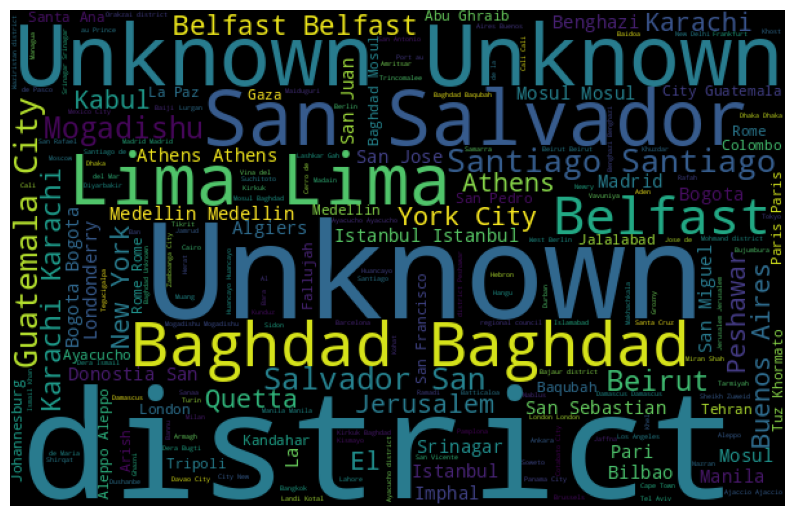

In [12]:
cities = data.City.dropna(False)
plt.subplots(figsize=(10,10))
wordcloud = WordCloud(background_color = 'black',
                     width = 600,
                     height = 384).generate(' '.join(cities))

plt.axis('off')
plt.imshow(wordcloud)
plt.show()


## **Facts**

In [13]:
print("Region with the most attacks:",data['Region'].value_counts().idxmax())
print("Country with the most attacks:",data['Country'].value_counts().idxmax())
print("Year with the most attacks:",data['Year'].value_counts().idxmax())
print("Most Attack Types :",data['AttackType'].value_counts().idxmax())
print("Most No Of Kills :",data['NoOfKills'].value_counts().idxmax())
print("Group with the most attacks:",data['GroupName'].value_counts().idxmax())
print("Type of weapon used with the most attacks:",data['WeaponType'].value_counts().idxmax())
print("Most targeted area:",data['Target'].value_counts().idxmax())


Region with the most attacks: Middle East & North Africa
Country with the most attacks: Iraq
Year with the most attacks: 2014
Most Attack Types : Bombing/Explosion
Most No Of Kills : 0.0
Group with the most attacks: Unknown
Type of weapon used with the most attacks: Explosives
Most targeted area: Civilians


In [14]:
killData = data.loc[:,'NoOfKills']
print('Number of people killed by Terror attack:', int(sum(killData.dropna())))

Number of people killed by Terror attack: 233729


# **visualization**

Name of the groups with **multiple *Attacks***

In [15]:
data.GroupName.value_counts()[1:15]

Shining Path (SL)                                   4164
Farabundo Marti National Liberation Front (FMLN)    3225
Taliban                                             2724
Irish Republican Army (IRA)                         2458
Islamic State of Iraq and the Levant (ISIL)         1795
Basque Fatherland and Freedom (ETA)                 1707
Kurdistan Workers' Party (PKK)                      1539
New People's Army (NPA)                             1512
Revolutionary Armed Forces of Colombia (FARC)       1511
Communist Party of India - Maoist (CPI-Maoist)      1452
Al-Shabaab                                          1324
National Liberation Army of Colombia (ELN)          1041
Palestinians                                        1034
Liberation Tigers of Tamil Eelam (LTTE)             1026
Name: GroupName, dtype: int64

### **Affected Countries**

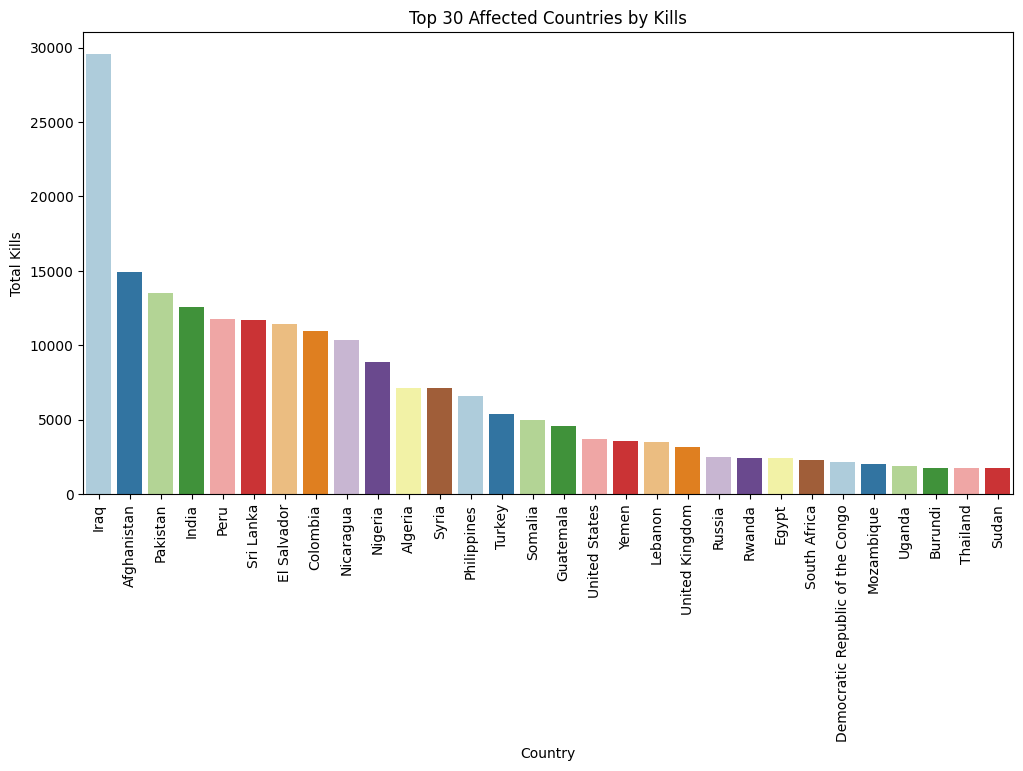

In [16]:
kills_per_country = data.groupby('Country')['NoOfKills'].sum().sort_values(ascending=False)

top_30_country_kills = kills_per_country.head(30)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_30_country_kills.index, y=top_30_country_kills.values, palette='Paired')

plt.title('Top 30 Affected Countries by Kills')
plt.xlabel('Country')
plt.ylabel('Total Kills')
plt.xticks(rotation=90)
plt.show()

Top 20 Affected Country by **kills**

In [17]:
countryData = data.loc[:,'Country']

In [18]:
countryKillData = pd.concat([countryData, killData], axis=1)

In [19]:
countryKillFormatData = countryKillData.pivot_table(columns='Country', values='NoOfKills', aggfunc='sum')


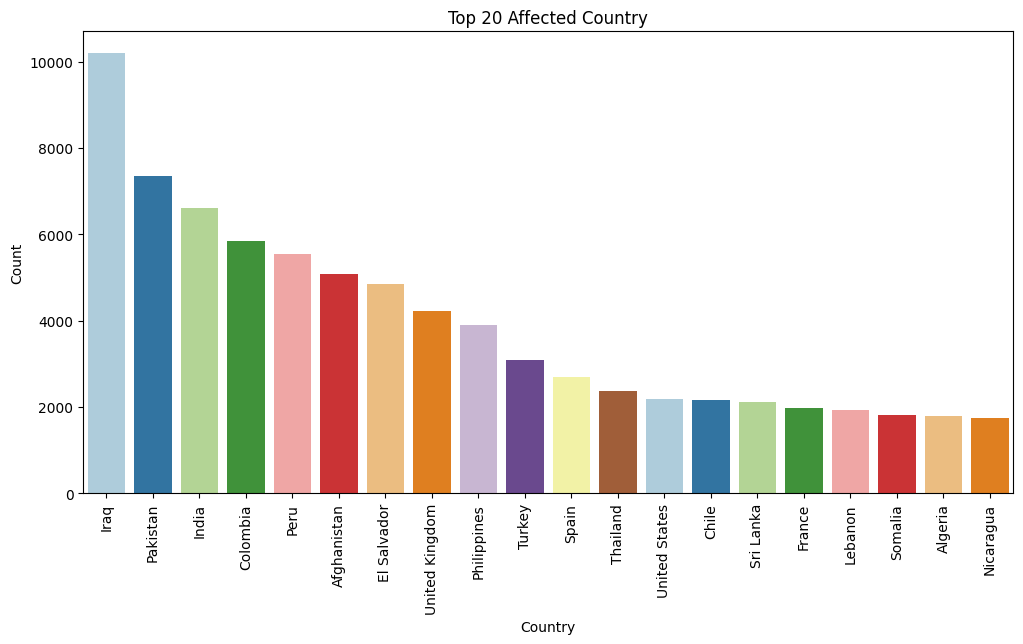

In [20]:

group_counts = data['Country'].value_counts().sort_values(ascending=False)

top_20_Country = group_counts.head(20)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_20_Country.index, y=top_20_Country.values, palette='Paired')

plt.title('Top 20 Affected Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


**Top terrorists group**

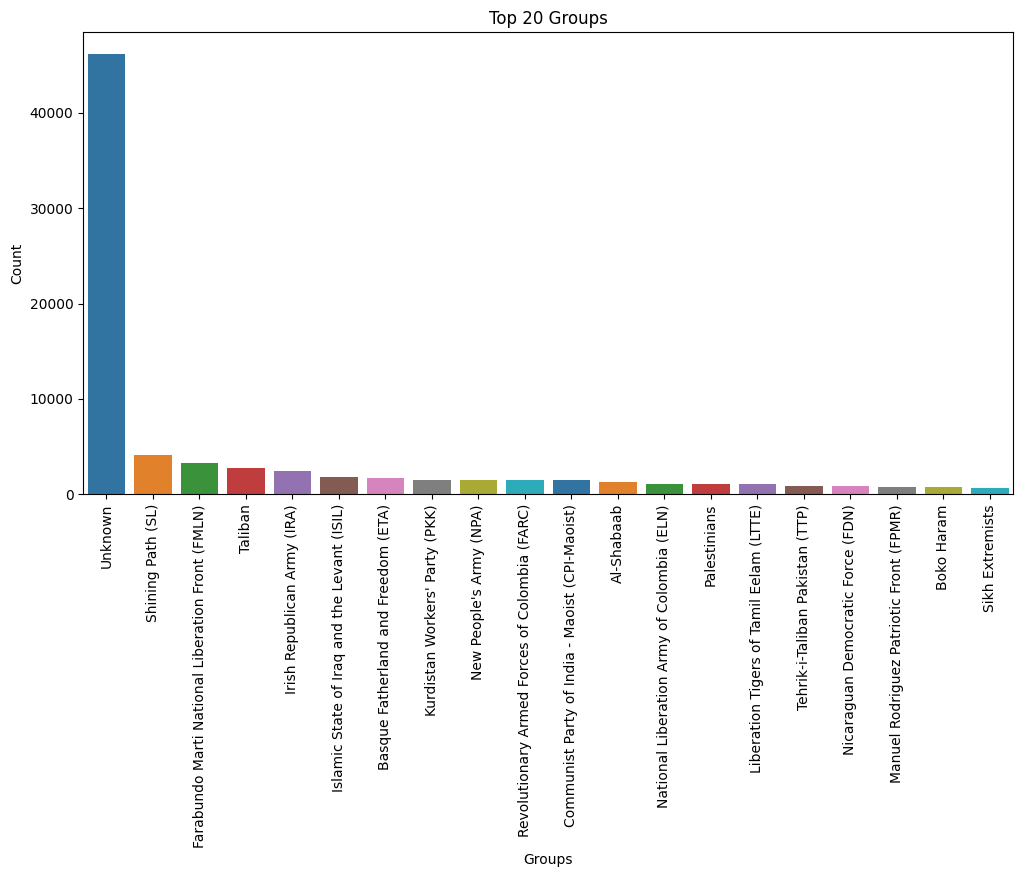

In [21]:
group_counts = data['GroupName'].value_counts().sort_values(ascending=False)

top_20_groups = group_counts.head(20)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_20_groups.index, y=top_20_groups.values, palette='tab10')

plt.title('Top 20 Groups')
plt.xlabel('Groups')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [22]:
group_killed= data[['GroupName','NoOfKills']].groupby(['GroupName'],axis=0).sum().sort_values('NoOfKills', ascending=False).head(15)
group_killed

,NoOfKills
GroupName,
Unknown,58723.0
Islamic State of Iraq and the Levant (ISIL),13351.0
Shining Path (SL),10720.0
Taliban,9893.0
Liberation Tigers of Tamil Eelam (LTTE),8013.0
Boko Haram,7898.0
Farabundo Marti National Liberation Front (FMLN),7815.0
Nicaraguan Democratic Force (FDN),6612.0
Al-Shabaab,4534.0


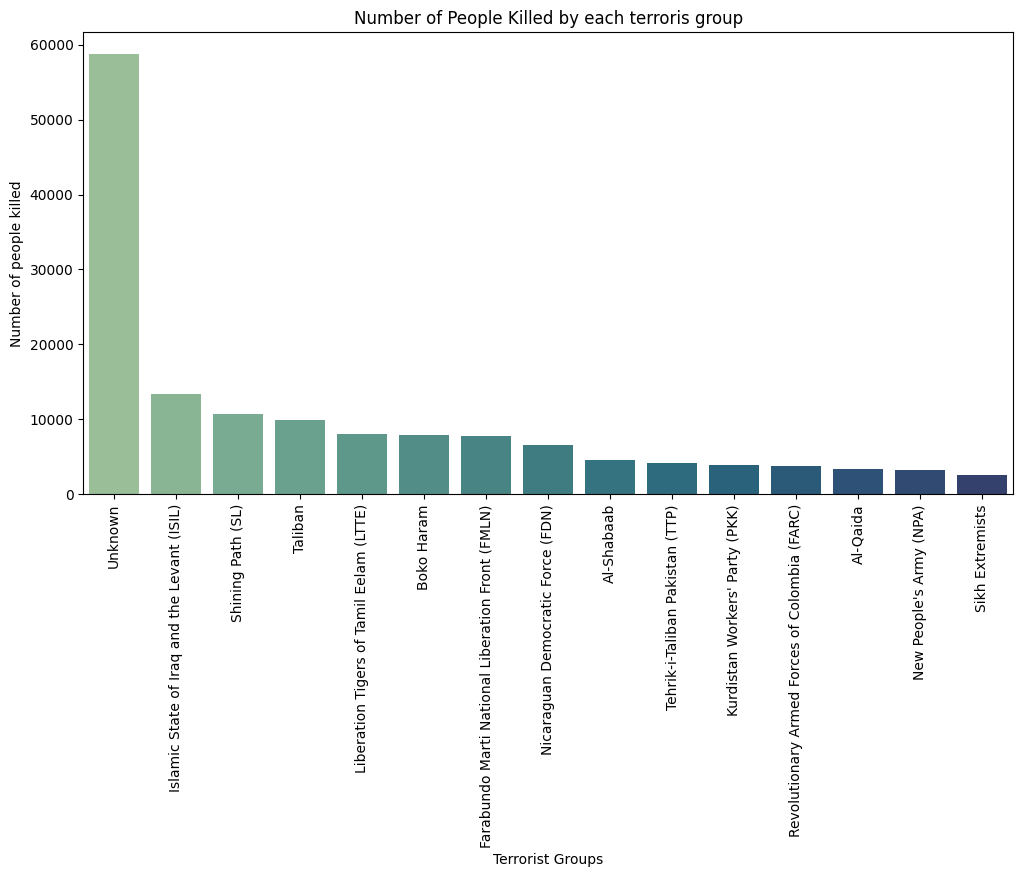

In [23]:
plt.subplots(figsize=(12,6))
sns.barplot(x=group_killed.index,y= group_killed.NoOfKills.values,palette="crest")
plt.title('Number of People Killed by each terroris group')
plt.xlabel('Terrorist Groups')
plt.ylabel('Number of people killed')
plt.xticks(rotation= 90)
plt.show()

**Attack pattern**

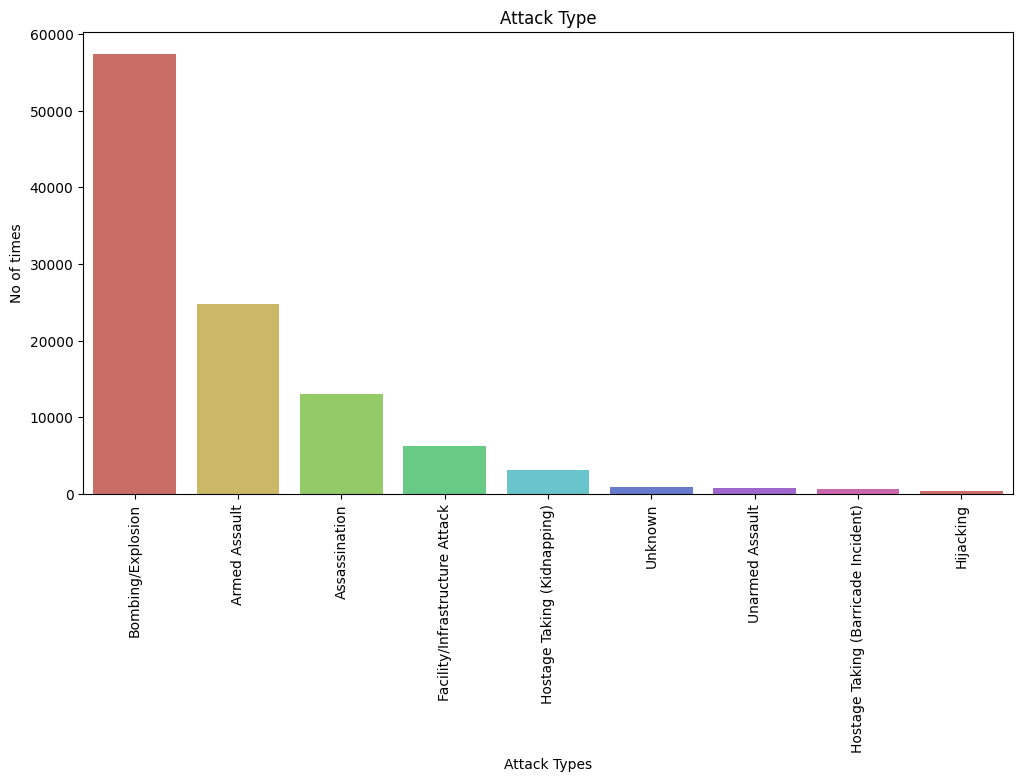

In [24]:
attacktype = data.AttackType.value_counts()[:15]


plt.subplots(figsize=(12,6))
sns.barplot(x=attacktype.index,y=attacktype.values,palette=sns.color_palette("hls", 8))
plt.title('Attack Type')
plt.xlabel('Attack Types')
plt.ylabel('No of times')
plt.xticks(rotation= 90)
plt.show()

In [25]:
attackkilled = data[['AttackType','NoOfKills']].groupby(["AttackType"],axis=0).sum()
attackkilled

,NoOfKills
AttackType,
Armed Assault,101999.0
Assassination,16778.0
Bombing/Explosion,96314.0
Facility/Infrastructure Attack,1841.0
Hijacking,3468.0
Hostage Taking (Barricade Incident),2922.0
Hostage Taking (Kidnapping),5900.0
Unarmed Assault,698.0
Unknown,3809.0


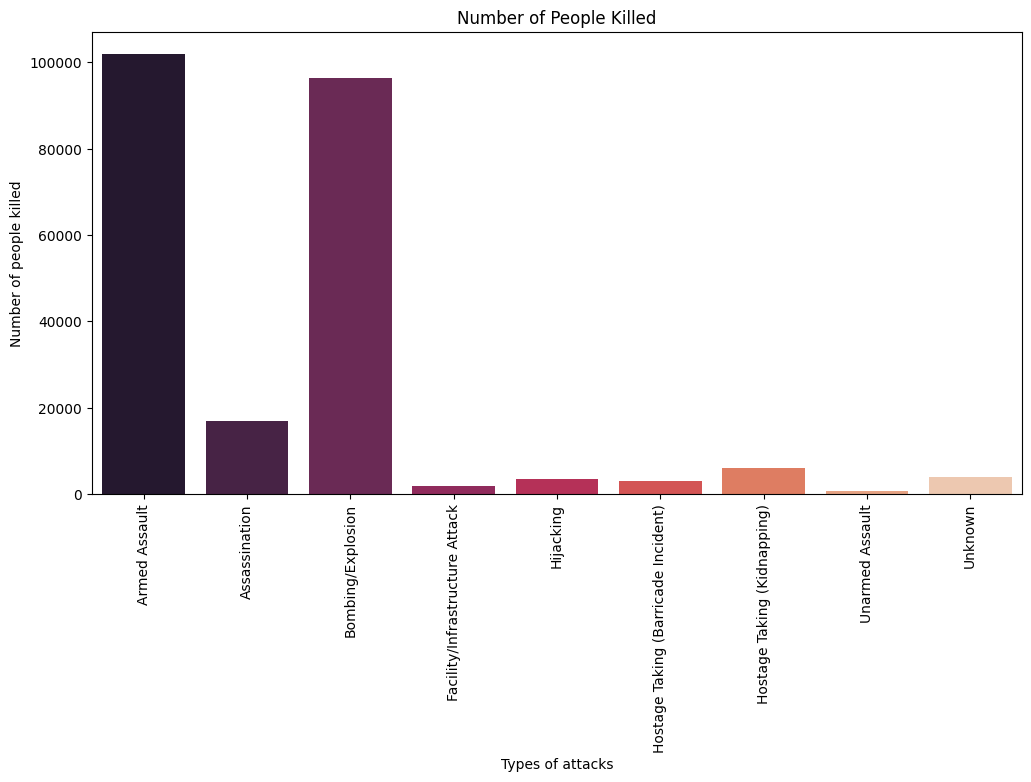

In [26]:
plt.subplots(figsize=(12,6))
sns.barplot(x=attackkilled.index, y=attackkilled.NoOfKills.values,palette=("rocket"))
plt.title('Number of People Killed')
plt.xlabel('Types of attacks')
plt.ylabel('Number of people killed')
plt.xticks(rotation= 90)
plt.show()

In [27]:
region_counts = data.groupby(['latitude', 'longitude']).size().reset_index(name='incident_count')
high_risk_threshold = 10
region_counts['risk_score'] = region_counts['incident_count'].apply(lambda x: 'High' if x > high_risk_threshold else 'Low')
print(region_counts[['latitude', 'longitude', 'risk_score']])



        latitude   longitude risk_score
0     -53.154613  -70.916943        Low
1     -51.692214  -57.858900        Low
2     -45.867889  -67.499911        Low
3     -45.571112  -72.068517        Low
4     -45.403544  -72.686416        Low
...          ...         ...        ...
26824  62.257094   25.188353        Low
26825  64.135338  -21.895210        Low
26826  64.837778 -147.716389        Low
26827  65.012089   25.465077        Low
26828  65.683368  -18.100080        Low

[26829 rows x 3 columns]


In [28]:
import plotly.express as px

# Assuming you have loaded your data into the 'data' DataFrame

# Group data by latitude and longitude and calculate incident count
region_counts = data.groupby(['latitude', 'longitude']).size().reset_index(name='incident_count')

# Define a threshold for what constitutes a high-risk region (you can adjust this)
high_risk_threshold = 10

# Calculate the risk score for each region based on the incident count
region_counts['risk_score'] = region_counts['incident_count'].apply(lambda x: 'High' if x > high_risk_threshold else 'Low')

# Filter the data to select high-risk regions
high_risk_data = region_counts[region_counts['risk_score'] == 'High']

# Create an interactive bubble map with larger markers
fig = px.scatter_geo(
    high_risk_data,
    lat='latitude',
    lon='longitude',
    size='incident_count',  # Size of the bubble markers
    color='incident_count',  # Color based on incident count
    hover_name='risk_score',  # Hover text shows risk score
    projection='natural earth',  # Map projection
    title='High-Risk Regions Bubble Map',
    opacity=0.6,  # Adjust marker opacity
    size_max=30  # Set the maximum size of the bubble markers
)

# Customize the appearance of the map
fig.update_geos(
    showcoastlines=True,
    coastlinecolor="Black",
    showland=True,
    landcolor="white",
)

# Show the interactive map with larger markers
fig.show()